In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
'''
случайная выборка ответов
30% - 1
--  - 0
1/2 prob pr

'''    

<h1> ROC Curve</h1>

[0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0]
(100,) (100,)


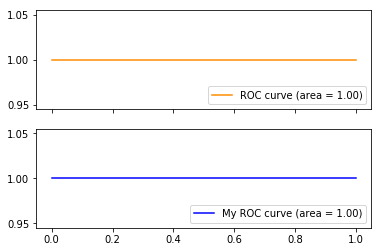

In [12]:
def roc_curve(y, score, pos_label=1):
    fpr, tpr = [], []
    min_score = min(score)
    max_score = max(score)
    thr = np.linspace(min_score, max_score, 30)
    thr = np.flip(thr)
    P = sum(y)
    N = len(y) - P
    for (_, T) in enumerate(thr):
        FP=0
        TP=0
        for i in range(0, len(score)):
            if (score[i] > T):
                if (y[i]==1):
                    TP = TP + 1
                else:
                    FP = FP + 1
        FPR = FP/float(N)
        TPR = TP/float(P)
        if(FPR == 0.0 and TPR == 0.0):
            continue
        fpr.append(FPR)
        tpr.append(TPR)

    fpr.append(1.0)
    tpr.append(1.0)
    
    return fpr, tpr, thr



score = np.array([0.1, 0.4, 0.35, 0.8])
y = np.array([0, 0, 1, 1])

sz = 100
score = np.random.randint(2, size=sz)#np.full((sz, 1), .5)#np.array([0.5, 0.5])
print(score)
y = score.copy()#np.random.randint(2, size=sz)
print(y.shape, score.shape)



fpr, tpr, thresholds = metrics.roc_curve(y, score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


my_fpr, my_tpr, _ = roc_curve(y, score, )
my_roc_auc = np.trapz(my_tpr,my_fpr)


f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
axarr[1].plot(my_fpr, my_tpr, color='blue', label='My ROC curve (area = %0.2f)' % my_roc_auc)

axarr[0].legend(loc="lower right")
axarr[1].legend(loc="lower right")

plt.show()

<h1> PR Curve</h1>

[1. 1.] [1. 0.]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


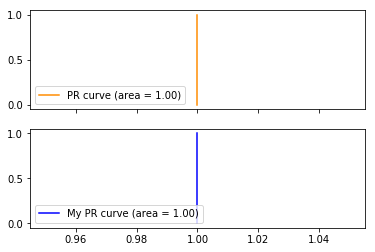

In [13]:
def pr_curve(y, score, pos_label=1):
    pr, re = [1.0], [0.0]
    min_score = min(score)
    max_score = max(score)
    thr = np.linspace(min_score, max_score, 30)
    thr = np.flip(thr)
    P = sum(y)
    N = len(y) - P
    for (_, T) in enumerate(thr):
        FP=0
        TP=0
        FN = 0
        TN = 0
        for i in range(0, len(score)):
            if (score[i] > T):
                if (y[i]==1):
                    TP = TP + 1
                else:
                    FP = FP + 1
            else:
                if (y[i]==1):
                    FN = FN + 1
                else:
                    TN = TN + 1
                
        FPR = FP/float(N)
        TPR = TP/float(P)
        if ((TP + FP) > 0.0):
            p = TP / float(TP + FP)
            r = TP / float(TP + FN) #TPR
            re.append(r)
            pr.append(p)
    
    return pr, re, thr


precision, recall, _ = metrics.precision_recall_curve(y, score)
pr_auc = metrics.auc(recall, precision)

print(precision, recall)

my_precision, my_recall, _ = pr_curve(y, score)
my_pr_auc = np.trapz(my_precision, my_recall)

print(my_precision, my_recall)

#PR
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(precision, recall, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)


axarr[1].plot(my_precision, my_recall, color='blue', label='My PR curve (area = %0.2f)' % my_pr_auc)

axarr[0].legend(loc="lower left")
axarr[1].legend(loc="lower left")


plt.show()